In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

test_size=0.1
batch_size = 1024
epochs = 20

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/gene_expression_regression/gene_expression_regression.csv')
data_array=data.iloc[:,1:].values
X = data_array[:,:943]
Y = data_array[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='tanh'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(),
              metrics=['mae'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         483,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 746,497 (2.85 MB)

 Trainable params: 746,497 (2.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - loss: 0.4069 - mae: 0.4582 - val_loss: 0.2197 - val_mae: 0.3358
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - loss: 0.2087 - mae: 0.3257 - val_loss: 0.1906 - val_mae: 0.3084
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - loss: 0.1798 - mae: 0.3015 - val_loss: 0.1804 - val_mae: 0.2971
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.1682 - mae: 0.2909 - val_loss: 0.1739 - val_mae: 0.2921
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - loss: 0.1588 - mae: 0.2819 - val_loss: 0.1721 - val_mae: 0.2868
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - loss: 0.1533 - mae: 0.2766 - val_loss: 0.1684 - val_mae: 0.2844
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - loss: 0.1495 - mae: 0.2717 - val_loss: 0.1658 - val_mae: 0.2794
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - loss: 0.1463 - mae: 0.2677 - val_loss: 0.1662 - val_mae: 0.2822
Epoch 9/20
114/114 ━━━━━━━━━━━━━━━

In [ ]:
y_pred=model.predict(x_test)

404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
y_test

array([ 0.69405097, -0.73703206, -0.7270724 , ..., -0.25099778,
       -0.14600763, -0.92649347])

In [ ]:
np.corrcoef(y_test.flatten(), y_pred.flatten())

array([[1.        , 0.93191815],
       [0.93191815, 1.        ]])

# Baseline linear regression model result

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
np.corrcoef(reg.predict(x_test).flatten(), y_test)

array([[1.        , 0.89667577],
       [0.89667577, 1.        ]])

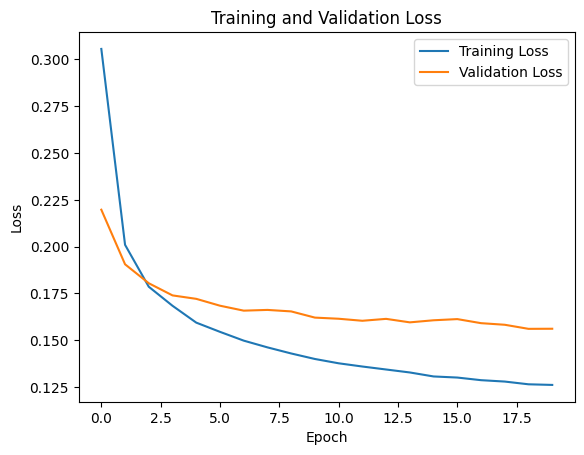

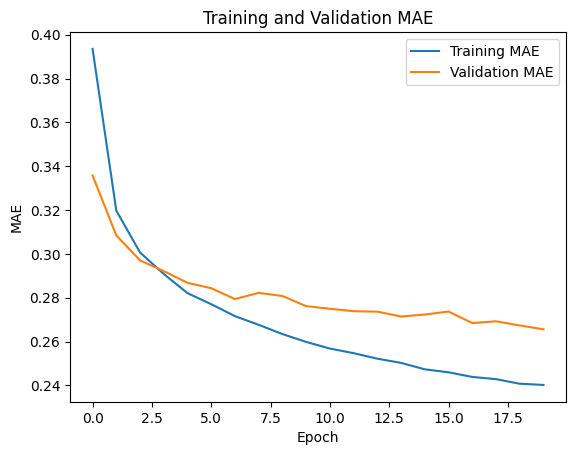

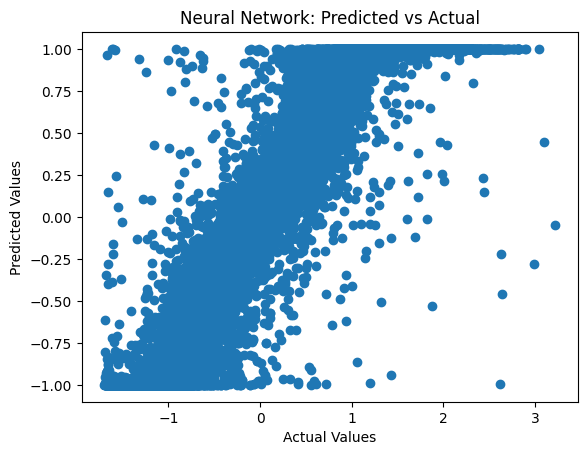

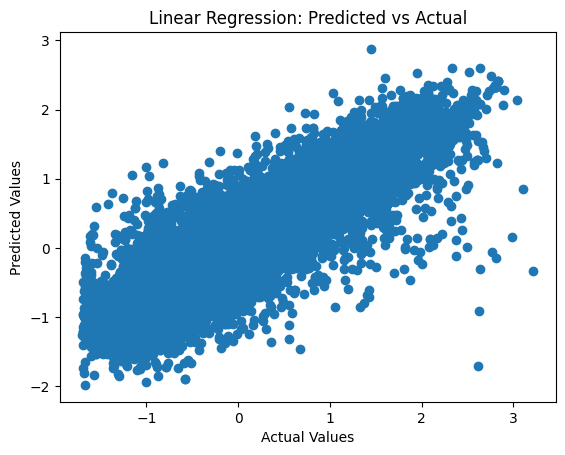

Neural Network Correlation: 0.9319181471259761
Linear Regression Correlation: 0.8966757728421054


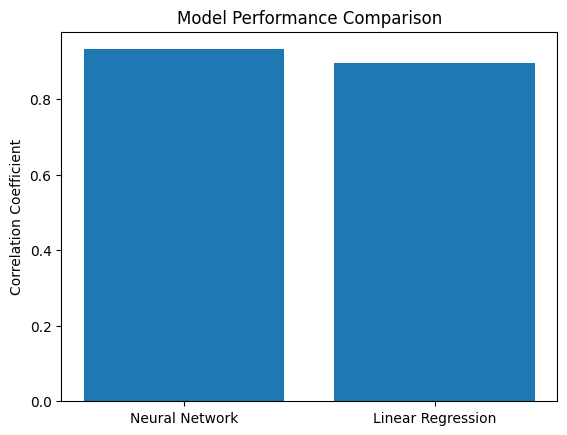

In [ ]:
# Visualize the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the training and validation MAE (Mean Absolute Error)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Scatter plot of predicted vs actual values for the neural network
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network: Predicted vs Actual')
plt.show()

# Scatter plot of predicted vs actual values for linear regression
plt.scatter(y_test, reg.predict(x_test))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual')
plt.show()


# Compare the correlation coefficients between neural network and linear regression
nn_corr = np.corrcoef(y_test.flatten(), y_pred.flatten())[0, 1]
lr_corr = np.corrcoef(reg.predict(x_test).flatten(), y_test)[0, 1]

print(f"Neural Network Correlation: {nn_corr}")
print(f"Linear Regression Correlation: {lr_corr}")


# Create a bar chart to compare the performance of the two models
plt.bar(['Neural Network', 'Linear Regression'], [nn_corr, lr_corr])
plt.ylabel('Correlation Coefficient')
plt.title('Model Performance Comparison')
plt.show()
